#Data Ingestion

For this step, we're reading in our training and test data. We'll be using a pandas Data Frame to keep track of our data.

We picked a pandas Data Frame over directly using a  NumPy array because we found pandas to already be a good wrapper for any numpy operations we could possibily want to implement.

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dfTrain = pd.read_csv('https://raw.githubusercontent.com/bterrific2008/cmps144-w19-sentiment-analysis-on-first-person-narratives/master/trainSentences.csv')
dfTest = pd.read_csv('https://raw.githubusercontent.com/bterrific2008/cmps144-w19-sentiment-analysis-on-first-person-narratives/master/testSentences.csv')

dfTrain.head(n=10)



,Unnamed: 0,id,sentence,sentiment
0,0,50f1ba41d7ee5a6cc987b20e_10.txt,She filled me in and then we were silent as we...,0
1,1,50f1ba41d7ee5a6cc987b20e_11.txt,"After pulling my wits together, I hung up on h...",0
2,2,50f1ba41d7ee5a6cc987b20e_16.txt,[By then my folks were living in southwestern ...,0
3,3,50f1ba41d7ee5a6cc987b20e_17.txt,We shared some flabergasted moments and then t...,0
4,4,50f1ba41d7ee5a6cc987b20e_18.txt,I started shrieking.,0
5,5,50f1ba41d7ee5a6cc987b20e_2.txt,"As usual, I chatted with the moms and other na...",0
6,6,50f1ba41d7ee5a6cc987b20e_20.txt,He had to hear me fall into a panicked mess.,0
7,7,50f1ba41d7ee5a6cc987b20e_21.txt,The home where I lived was close to the Dulles...,0
8,8,50f1ba41d7ee5a6cc987b20e_22.txt,Incoming and outgoing flights went over our ne...,0
9,9,50f1ba41d7ee5a6cc987b20e_26.txt,She wanted me to hop in the car that instant a...,0


#Preprocessing

We'll need to clean our data as well as tokenize our sentences.

##Data Cleaning

Data cleaning is the process of removing unnecessary features from our sentences.

####Remove Stopwords and Punctuation

* punctuation: Because people use punctuation differently online (grammar, emojis, code), there would be too many variations in uses that would make punctuation a meaningless feature

* stopwords: stopwords are words that typically do not hold meaningful information for our model. Examples include: "the, a, is"

####Convert all words to lowercase. 

This means that we could miss out on proper nouns that are supposed to be in uppercase, but there aren't a significant amount of proper nouns present in our dataset that we feel its neccessary to keep track of uppercase characters.

####Remove whitespace. 

Typically extra whitespace signifies typos from the user.

####Expand abbreviations.

Typically, expanding abbreviations helps gives us better context to avoid any (if any) unneccessary confusion

####Stemming/Lemmatization:

* Stemming: reducing words to their word stem, base or root form by cutting off the end of words. "There are several types of stemming algorithms" becomes "There are server type of stem algorithm"

* Lemmatization reduces words to a common base form using lexical knowledge. "been had done languages cities mice" becomes "be have do language city mouse"

[Source for text preprocessing steps](https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908)

[Source for lemmatizing code](https://stackoverflow.com/questions/47557563/lemmatization-of-all-pandas-cells)

In [0]:
sum(dfTrain['sentence'].str.len())

5296220

In [0]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

stop = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# https://simonhessner.de/lemmatize-whole-sentences-with-python-and-nltks-wordnetlemmatizer/
def lemmatize(sentence):
  lemmatizer = WordNetLemmatizer()
  tokens = sentence.split()
  newSentence = ""
  for word in tokens:
    newSentence += lemmatizer.lemmatize(word) + " "
  return newSentence.strip()
  

def remove_punctuations(sentence):
  for punctuation in string.punctuation:
    if punctuation == '-':
      sentence = sentence.replace(punctuation, ' ')
    else:
      sentence = sentence.replace(punctuation, '')
  return sentence



dfTrain['sentenceProcessed'] = dfTrain['sentence'].apply(remove_punctuations).str.lower()
dfTrain['sentenceProcessed'] = dfTrain['sentenceProcessed'].str.replace('\d+', '')
dfTrain['sentenceProcessed'] = dfTrain['sentenceProcessed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dfTrain['sentenceProcessed'] = dfTrain['sentenceProcessed'].apply(lemmatize)

dfTest['sentenceProcessed'] = dfTest['sentence'].apply(remove_punctuations).str.lower()
dfTest['sentenceProcessed'] = dfTest['sentenceProcessed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dfTest['sentenceProcessed'] = dfTest['sentenceProcessed'].apply(lemmatize)

dfTrain.head(n=30)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Unnamed: 0,id,sentence,sentiment,sentenceProcessed
0,0,50f1ba41d7ee5a6cc987b20e_10.txt,She filled me in and then we were silent as we...,0,filled silent watched news coverage
1,1,50f1ba41d7ee5a6cc987b20e_11.txt,"After pulling my wits together, I hung up on h...",0,pulling wit together hung started calling round
2,2,50f1ba41d7ee5a6cc987b20e_16.txt,[By then my folks were living in southwestern ...,0,folk living southwestern virginia four hour dr...
3,3,50f1ba41d7ee5a6cc987b20e_17.txt,We shared some flabergasted moments and then t...,0,shared flabergasted moment report came pentagon
4,4,50f1ba41d7ee5a6cc987b20e_18.txt,I started shrieking.,0,started shrieking
5,5,50f1ba41d7ee5a6cc987b20e_2.txt,"As usual, I chatted with the moms and other na...",0,usual chatted mom nanny walked back house
6,6,50f1ba41d7ee5a6cc987b20e_20.txt,He had to hear me fall into a panicked mess.,0,hear fall panicked mess
7,7,50f1ba41d7ee5a6cc987b20e_21.txt,The home where I lived was close to the Dulles...,0,home lived close dulles airport
8,8,50f1ba41d7ee5a6cc987b20e_22.txt,Incoming and outgoing flights went over our ne...,0,incoming outgoing flight went neighborhood reg...
9,9,50f1ba41d7ee5a6cc987b20e_26.txt,She wanted me to hop in the car that instant a...,0,wanted hop car instant drive home


In [0]:
# xTrain = dfTrain['sentenceProcessed']
# yTrain = dfTrain['sentiment']
# xTest = dfTest['sentenceProcessed']
# yTest = dfTest['sentiment']
xTrain, xTest, yTrain, yTest = train_test_split(dfTrain['sentenceProcessed'],dfTrain['sentiment'],test_size=0.33,random_state=42)
# dfTrain['sentenceProcessed'][27]

##Tokenization

Tokenization is the process of breaking up our sentences into a series of words.

In [0]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(dfTrain['sentenceProcessed'].values)
print("Word Counts: ", tokenizer.word_counts) # a dictionary of words and their counts
print("Document Count: ", str(tokenizer.document_count)) # an integer count of the total number of documents used to fit the Tokenizer
print("Word Index: ", str(tokenizer.word_index)) # a dictionary of words and their uniquely assigned integers
print("Word Docs: ", str(tokenizer.word_docs)) # a dictionary of words and how many documents each appeared in
print("Vocab Size: ", len(tokenizer.word_index)+1)

print(len(max(dfTrain['sentenceProcessed'].str.split(),key=len)))
print((max(dfTrain['sentenceProcessed'],key=len)))

from tensorflow.python.keras.preprocessing import sequence
maxWords = 32 # max sentence length

print(xTrain[0])

rnn_xTrain = tokenizer.texts_to_sequences(xTrain)
rnn_xTrain = sequence.pad_sequences(rnn_xTrain, maxlen=maxWords)

print(rnn_xTrain[0])

Word Counts:  OrderedDict([('filled', 132), ('silent', 20), ('watched', 299), ('news', 167), ('coverage', 9), ('pulling', 30), ('wit', 12), ('together', 602), ('hung', 154), ('started', 933), ('calling', 97), ('round', 92), ('folk', 63), ('living', 179), ('southwestern', 2), ('virginia', 18), ('four', 194), ('hour', 1048), ('drive', 305), ('away', 764), ('shared', 66), ('flabergasted', 1), ('moment', 284), ('report', 49), ('came', 1085), ('pentagon', 2), ('shrieking', 2), ('usual', 137), ('chatted', 41), ('mom', 940), ('nanny', 15), ('walked', 349), ('back', 2697), ('house', 1041), ('hear', 204), ('fall', 249), ('panicked', 8), ('mess', 66), ('home', 1849), ('lived', 113), ('close', 284), ('dulles', 1), ('airport', 75), ('incoming', 5), ('outgoing', 4), ('flight', 76), ('went', 3110), ('neighborhood', 50), ('regularly', 17), ('wanted', 976), ('hop', 13), ('car', 847), ('instant', 10), ('onto', 108), ('employer', 4), ('custom', 17), ('showered', 30), ('dressed', 68), ('alone', 277), ('o

#Vectorize

Computers won't be able to understand words from scratch. We'll need to use one-hot encoding to turn our sentence data into something machine-readable.

#Learn and Testing our Model

Now, with the data cleaned and vectorized, we can start to train our model.

[Probably should read this paper](https://www.cs.cmu.edu/~hovy/papers/16HLT-hierarchical-attention-networks.pdf)

# Bayes Implementation
[Source](https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(xTrain)
xTest_bayes = cv.transform(xTest)

In [0]:
from sklearn.naive_bayes import MultinomialNB
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(text_counts, yTrain)
predicted= clf.predict(xTest_bayes)

In [0]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(yTest, predicted) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(yTest, predicted) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(yTest, predicted))
tn, fp, fn, tp = confusion_matrix(yTest, predicted).ravel()
print(tn, fp, fn, tp)

def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
  
vectorizer = cv
feature_names = vectorizer.get_feature_names()
print(feature_names)
logistic = clf

show_most_informative_features(vectorizer, logistic, 10)

Accuracy: 76.05%

F1 Score: 81.95

Confusion Matrix:
 [[ 5109  3113]
 [ 2523 12792]]
5109 3113 2523 12792
['0', '00', '000', '0000', '0000025', '008080', '010', '01500', '02', '033', '06', '07', '07a12', '08', '09', '090608pgn', '1', '10', '100', '1000', '10000', '1000pm', '1009', '100am', '100mg', '100pm', '100th', '100we', '101', '1015', '1015am', '1018', '1020', '10200', '1022', '1025', '1027', '102rose', '1030', '1030am', '1030pm', '103rd', '104', '1040', '1045', '105', '1050', '1054', '1058', '1059', '106', '107', '10am', '10cm', '10ft', '10hr', '10k', '10lb', '10lbs', '10pm', '10th', '10x', '10x12', '11', '110', '1100', '11000', '1100000000000000000000000000000wfrth', '1100pm', '1109', '1109am', '110am', '110pm', '11100', '1111', '1115', '112', '1120', '1130', '1130p', '1130pm', '1136', '1145', '1145pm', '1149', '115', '1155', '116', '117', '117pm', '118', '11907', '11a', '11am', '11ish', '11lbs', '11pm', '11pmdunnoe', '11th', '11wks', '12', '120', '1200', '12000', '120000', '120

# With a TF-IDF vectorizer rather than a standard count vectorizer


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
tf=TfidfVectorizer()
text_tf= tf.fit_transform(xTrain)
xTest_tf = tf.transform(xTest)

clf = MultinomialNB().fit(text_tf, yTrain)
predicted= clf.predict(xTest_tf)

print("Accuracy: {:.2f}%".format(accuracy_score(yTest, predicted) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(yTest, predicted) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(yTest, predicted))
tn, fp, fn, tp = confusion_matrix(yTest, predicted).ravel()
print(tn, fp, fn, tp)

def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
  
vectorizer = tf
feature_names = vectorizer.get_feature_names()
print(feature_names)
logistic = clf

show_most_informative_features(vectorizer, logistic, 10)

Accuracy: 75.31%

F1 Score: 83.03

Confusion Matrix:
 [[ 3513  4709]
 [ 1102 14213]]
3513 4709 1102 14213
['00', '000', '0000', '0000025', '008080', '010', '01500', '02', '033', '06', '07', '07a12', '08', '09', '090608pgn', '10', '100', '1000', '10000', '1000pm', '1009', '100am', '100mg', '100pm', '100th', '100we', '101', '1015', '1015am', '1018', '1020', '10200', '1022', '1025', '1027', '102rose', '1030', '1030am', '1030pm', '103rd', '104', '1040', '1045', '105', '1050', '1054', '1058', '1059', '106', '107', '10am', '10cm', '10ft', '10hr', '10k', '10lb', '10lbs', '10pm', '10th', '10x', '10x12', '11', '110', '1100', '11000', '1100000000000000000000000000000wfrth', '1100pm', '1109', '1109am', '110am', '110pm', '11100', '1111', '1115', '112', '1120', '1130', '1130p', '1130pm', '1136', '1145', '1145pm', '1149', '115', '1155', '116', '117', '117pm', '118', '11907', '11a', '11am', '11ish', '11lbs', '11pm', '11pmdunnoe', '11th', '11wks', '12', '120', '1200', '12000', '120000', '12000000', '1

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(yTest, predicted)
#sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
#            xticklabels=train.target_names, yticklabels=train.target_names)
#plt.xlabel('true label')
#plt.ylabel('predicted label');

##Logistic Regression

Logistic Regression is the go-to method for binary classification problems. It uses an equation as the representation.

###Linear Regression

I thought about using linear regression. Turns out that's a horrible model for classification data.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

clf = Pipeline([
    ('tfidf',TfidfVectorizer(
        min_df=2)),
    ('clf', LogisticRegression(fit_intercept=False))
])

def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

clf.fit(xTrain, yTrain)
vectorizer = clf.named_steps['tfidf']
feature_names = vectorizer.get_feature_names()
print(feature_names)
logistic = clf.named_steps['clf']
print(xTrain[0])
print(logistic.coef_[0])

show_most_informative_features(vectorizer, logistic, 10)

predicted= clf.predict(xTest)

print("Accuracy: {:.2f}%".format(accuracy_score(yTest, predicted) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(yTest, predicted) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(yTest, predicted))
tn, fp, fn, tp = confusion_matrix(yTest, predicted).ravel()
print(tn, fp, fn, tp)

predicted = clf.predict(["I am shutting out the negative people from my life"])
print(predicted)
predicted = clf.predict_proba(["I am shutting out the negative people from my life"])
print(predicted)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['00', '000', '06', '08', '09', '10', '100', '1000', '10000', '1000pm', '101', '1030', '1030pm', '1045', '105', '106', '10am', '10cm', '10pm', '10th', '11', '110', '1100', '1109', '1111', '1115', '112', '1120', '1130', '1130pm', '115', '116', '117', '11am', '11ish', '11lbs', '11pm', '11th', '12', '120', '1200', '1215', '1230', '1230am', '1240', '1245pm', '125', '126', '12pm', '12th', '13', '130', '135', '13th', '14', '140', '145', '14th', '15', '150', '1500', '153', '15th', '16', '160', '167aviatorvader2008', '16km', '16th', '17', '170', '1700', '18', '185', '18th', '19', '1921', '1931', '1950s', '1976', '1980s', '1984', '1986', '1989', '1990', '1991', '1997', '1998', '1999', '19th', '1am', '1hour', '1pm', '1st', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '200am', '2020', '205', '20th', '21', '215', '219', '21st', '22', '225', '22nd', '23', '230', '235', '23rd', '24', '247', '24th', '25', '250', '25th', '26', '26th', '27', '274', '275',

##Recurrent Neural Network

Explain what a RNN is

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

Custom metric function to obtain the F1 score

Code from [here](https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras)

In [0]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [0]:
from tensorflow.python.keras.preprocessing import sequence
maxWords = 32 # max sentence length

rnn_xTrain = tokenizer.texts_to_sequences(xTrain)
rnn_xTrain = sequence.pad_sequences(rnn_xTrain, maxlen=maxWords)


from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

vocabSize = len(tokenizer.word_index)+1
embedSize = 32 # check embed size

print(vocabSize, " ", maxWords)

import os

import tensorflow as tf
from tensorflow import keras

# we may want to tear apart this pipeline
model=Sequential() # switch to functional instead of Sequential
model.add(Embedding(vocabSize,embedSize,input_length=maxWords))
model.add(Bidirectional(LSTM(100, 
                             activation='softsign',
                            recurrent_dropout=0.3,
                            dropout=0.2))) # tune number of neurons 
model.add(Dense(1,activation='sigmoid')) 

print(model.summary())

model.compile(loss='binary_crossentropy',
             optimizer='SGD', # swithc optimizer ot have an adaptive learning rate
             metrics=[f1])

batch_size = 32 # tune
num_epochs = 75 # tune

X_valid, y_valid = rnn_xTrain[:batch_size], yTrain[:batch_size]
X_train2, y_train2 = rnn_xTrain[batch_size:], yTrain[batch_size:]


#import tensorflow as tf
#import os
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR'] # FOR USE ON GOOGLE CLOUD
tpu_model = tf.contrib.tpu.keras_to_tpu_model(model,strategy=tf.contrib.tpu.TPUDistributionStrategy(tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

history = tpu_model.fit(rnn_xTrain, yTrain,
         batch_size = batch_size, epochs=num_epochs, validation_split=0.2)

33144   32
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 32)            1060608   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               106400    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 1,167,209
Trainable params: 1,167,209
Non-trainable params: 0
_________________________________________________________________
None

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionalit

In [0]:
tpu_model.save_weights('./tpu_model.h5', overwrite=True)

INFO:tensorflow:Copying TPU weights to the CPU
INFO:tensorflow:TPU -> CPU lr: 0.009999999776482582
INFO:tensorflow:TPU -> CPU momentum: 0.0
INFO:tensorflow:TPU -> CPU decay: 0.0
INFO:tensorflow:TPU -> CPU nesterov: False


In [0]:
# we may want to tear apart this pipeline
model=Sequential() # switch to functional instead of Sequential
model.add(Embedding(vocabSize,embedSize,input_length=maxWords))
model.add(Bidirectional(LSTM(100, 
                             activation='softsign',
                            recurrent_dropout=0.3,
                            dropout=0.2))) # tune number of neurons 
model.add(Dense(1,activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
             optimizer='SGD', # swithc optimizer ot have an adaptive learning rate
             metrics=[f1])


model.load_weights('./tpu_model.h5')
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 32)            1060608   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,167,209
Trainable params: 1,167,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
rnn_xTest = tokenizer.texts_to_sequences(xTest)
rnn_xTest = sequence.pad_sequences(rnn_xTest, maxlen=maxWords)

scores = model.evaluate(rnn_xTest, yTest, verbose=0)
print('Test accuracy:',scores[1])

Test accuracy: 0.40247932


In [0]:
#import tensorflow as tf
#import os
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR'] # FOR USE ON GOOGLE CLOUD
tpu_model = tf.contrib.tpu.keras_to_tpu_model(model,strategy=tf.contrib.tpu.TPUDistributionStrategy(tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

history = tpu_model.fit(rnn_xTrain, yTrain,
         batch_size = batch_size, epochs=num_epochs, validation_split=0.2)

INFO:tensorflow:Querying Tensorflow master (grpc://10.48.70.154:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 16871090404456730252)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 1398171411725512784)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 196685457444760092)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 11574098433477571380)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 8279085860947095188)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt


print(history.history.keys())

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['f1']
val_acc = history.history['val_f1']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

NameError: ignored

##Weird word2vec approach I found online

General approach seems to embed everything via word2vec, and then dense everything together to find the sentiments.

https://ahmedbesbes.com/sentiment-analysis-on-twitter-using-word2vec-and-keras.html

In [0]:
from tqdm import tqdm
import gensim
from gensim.models.word2vec import Word2Vec
LabeledSentence = gensim.models.doc2vec.LabeledSentence
from sklearn.decomposition import PCA
from matplotlib import pyplot

def labelizeSentences(sentences, label_type):
  labelized = []
  for i,v in tqdm(enumerate(sentences)):
    label = '%s_%s'%(label_type,i)
    labelized.append(LabeledSentence(v, [label]))
  return labelized

# Tokenize step
x_train = xTrain.str.split()
x_test = xTest.str.split()

def labelizeSentence(sentence, label_type):
  labelized = []
  for i,v in enumerate(sentence):
    label = '%s_%s'%(label_type,i)
    labelized.append(LabeledSentence(v, [label]))
  return labelized

x_train = labelizeSentence(x_train, 'TRAIN')
x_test = labelizeSentence(x_test, 'TEST')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


In [0]:
n_dim = 200
w2v = Word2Vec(size=n_dim, min_count = 10)
w2v.build_vocab([x.words for x in x_train])
w2v.train([x.words for x in x_train], total_examples= len(x_train), epochs=9)


(3702571, 4541436)

In [0]:
w2v.most_similar('good')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cool', 0.7448855638504028),
 ('bad', 0.736141562461853),
 ('great', 0.7263239622116089),
 ('nice', 0.717768669128418),
 ('boring', 0.693243145942688),
 ('awesome', 0.6862965822219849),
 ('decent', 0.6831647157669067),
 ('interesting', 0.6487565636634827),
 ('whole', 0.6441531181335449),
 ('perfect', 0.6397553086280823)]

In [0]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

word_vectors = [w2v[w] for w in list(w2v.wv.vocab.keys())[:5000]]

from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)


# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(w2v.wv.vocab.keys())[:5000]

# plotting
plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

Loading BokehJS ...

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4779 samples in 0.035s...
[t-SNE] Computed neighbors for 4779 samples in 13.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4779
[t-SNE] Computed conditional probabilities for sample 2000 / 4779
[t-SNE] Computed conditional probabilities for sample 3000 / 4779
[t-SNE] Computed conditional probabilities for sample 4000 / 4779
[t-SNE] Computed conditional probabilities for sample 4779 / 4779
[t-SNE] Mean sigma: 0.176434
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.707146
[t-SNE] KL divergence after 1000 iterations: 2.167285


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.words for x in x_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

print("Vocab Size: ", len(tfidf))

def buildWordVector(tokens, size):
  vec = np.zeros(size).reshape((1, size))
  count = 0.
  for word in tokens:
    try:
      vec += w2v[word].reshape((1, size)) * tfidf[word]
      count += 1.
    except KeyError: # handling case where token is not in corpus. Testing
      continue
    if count != 0:
      vec /= count
  return vec

for x in x_train:
  p = (buildWordVector(x.words, n_dim).shape)
  if(p[0]!=1 or p[1]!=200):
    print(p)

print(n_dim)

from sklearn.preprocessing import scale
train_vecs_w2v = np.concatenate([buildWordVector(z, n_dim) for z in map(lambda x: x.words, x_train)])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, n_dim) for z in map(lambda x: x.words, x_test)])
test_vecs_w2v = scale(test_vecs_w2v)

Vocab Size:  4720


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


200


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

w2v_model = Sequential()
w2v_model.add(Dense(32, activation='relu', input_shape=train_vecs_w2v[0].shape))
w2v_model.add(Dense(1, activation='sigmoid'))
w2v_model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['binary_accuracy'])

history = w2v_model.fit(train_vecs_w2v, yTrain.values, epochs=50, verbose=2, validation_split=0.2)

'''try:
 device_name = os.environ['COLAB_TPU_ADDR']
 TPU_ADDRESS = 'grpc://' + device_name
 print('Found TPU at: {}'.format(TPU_ADDRESS))

except KeyError:
 print('TPU not found')
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    w2v_model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))
history = tpu_model.fit(train_vecs_w2v, yTrain.values, epochs=50, batch_size=32, verbose=2, validation_split=0.2)'''


Train on 57057 samples, validate on 14265 samples
Epoch 1/50
 - 16s - loss: 0.6408 - binary_accuracy: 0.6393 - val_loss: 0.4746 - val_binary_accuracy: 0.8247
Epoch 2/50
 - 5s - loss: 0.6281 - binary_accuracy: 0.6487 - val_loss: 0.4424 - val_binary_accuracy: 0.8562
Epoch 3/50
 - 5s - loss: 0.6250 - binary_accuracy: 0.6528 - val_loss: 0.5045 - val_binary_accuracy: 0.7986
Epoch 4/50
 - 5s - loss: 0.6221 - binary_accuracy: 0.6528 - val_loss: 0.5577 - val_binary_accuracy: 0.7213
Epoch 5/50
 - 4s - loss: 0.6199 - binary_accuracy: 0.6552 - val_loss: 0.4752 - val_binary_accuracy: 0.8290
Epoch 6/50
 - 4s - loss: 0.6187 - binary_accuracy: 0.6554 - val_loss: 0.4587 - val_binary_accuracy: 0.8298
Epoch 7/50
 - 5s - loss: 0.6171 - binary_accuracy: 0.6569 - val_loss: 0.6199 - val_binary_accuracy: 0.6790
Epoch 8/50
 - 5s - loss: 0.6161 - binary_accuracy: 0.6582 - val_loss: 0.5467 - val_binary_accuracy: 0.7299
Epoch 9/50
 - 5s - loss: 0.6149 - binary_accuracy: 0.6604 - val_loss: 0.4851 - val_binary_acc

"try:\n device_name = os.environ['COLAB_TPU_ADDR']\n TPU_ADDRESS = 'grpc://' + device_name\n print('Found TPU at: {}'.format(TPU_ADDRESS))\n\nexcept KeyError:\n print('TPU not found')\ntpu_model = tf.contrib.tpu.keras_to_tpu_model(\n    w2v_model,\n    strategy=tf.contrib.tpu.TPUDistributionStrategy(\n        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))\nhistory = tpu_model.fit(train_vecs_w2v, yTrain.values, epochs=50, batch_size=32, verbose=2, validation_split=0.2)"

 - 0s - loss: 0.7373 - binary_accuracy: 0.5665
0.56651884


Text(0.5, 1.0, 'Training and validation loss')

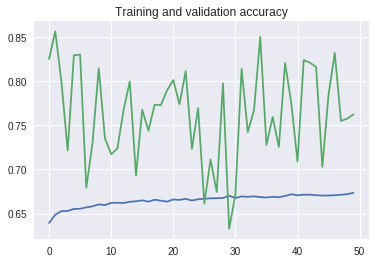

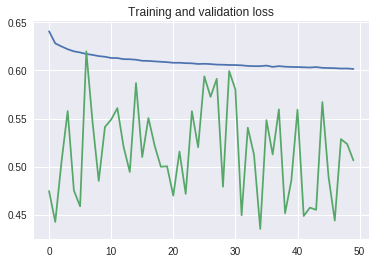

In [0]:
score = w2v_model.evaluate(test_vecs_w2v, yTest.values, verbose=2)
print(score[1])

%matplotlib inline

import matplotlib.pyplot as plt


# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')